# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [2]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer


# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = ""
consumer_secret = ""
access_token = ""
access_secret = ""

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
response

<Response [200]>

In [4]:
with open(url.split('/')[-1], 'wb') as file:
    file.write(response.content)

In [5]:
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [7]:
api = tweepy.API(auth, wait_on_rate_limit = True,wait_on_rate_limit_notify=True)

In [8]:
twitter_archive = pd.read_csv("twitter-archive-enhanced-2.csv")

In [9]:
twitter_archive.head(5)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [11]:
df_list = []
with open('tweet_json.txt', mode='r', encoding='utf-8') as file:
    lines = file.readlines()
    # read tweet JSON data line by line
    for line in lines:
        data = json.loads(line)
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        df_list.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count})
tweet_data = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

In [12]:
tweet_data.sample(5)

,tweet_id,retweet_count,favorite_count
601,798644042770751489,2153,0
1720,680115823365742593,1028,2972
2067,671134062904504320,212,796
1378,701214700881756160,5812,13475
301,836648853927522308,626,0


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [13]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### This dataframe snapshot shows that there are Null values in the columns doggo, floofer, pupper and puppo but they are represented by 'None'. Also On using the head function, I can see that a lot of columns here have NaN values.

In [14]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

##### Using the .info function, there are lot of columns that have null values than those with non-null values. columns like in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id aren't of much use here. The tweet_id should be in strings rather than integers

In [15]:
# I noticed inconsistencies with the denominator so this is tho check them
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [18]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


###### Checking with info function, the tweet_Id would be preferably in strings rather than integers since I will not be using it for statistical purposes like sum.

In [19]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [20]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [21]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1267,749403093750648834,https://pbs.twimg.com/media/CmZqIslWIAQFiqe.jpg,1,Chesapeake_Bay_retriever,0.694541,True,curly-coated_retriever,0.076335,True,Irish_water_spaniel,0.048550,True
565,678278586130948096,https://pbs.twimg.com/media/CWm6xySUEAAqfFU.jpg,1,Maltese_dog,0.897841,True,Lhasa,0.035717,True,Tibetan_terrier,0.017107,True
352,672538107540070400,https://pbs.twimg.com/media/CVVV1wJWoAEcOyk.jpg,1,Siamese_cat,0.383937,False,Chihuahua,0.160274,True,giant_panda,0.147745,False
1243,747219827526344708,https://pbs.twimg.com/media/Cl6odlVWQAIy5uk.jpg,2,Shetland_sheepdog,0.548018,True,marmot,0.165503,False,collie,0.043003,True
1596,798933969379225600,https://pbs.twimg.com/media/CxZiLcLXUAApMVy.jpg,1,Siberian_husky,0.703224,True,Eskimo_dog,0.229351,True,malamute,0.044351,True


####### The underscores visible in the predictions columns make the data look a little untidy

In [22]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


#####  Checking with info function, the tweet_Id would be preferably in strings rather than integers

In [23]:
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [24]:
tweet_data.sample(5)

,tweet_id,retweet_count,favorite_count
441,819588359383371776,2271,10606
822,769940425801170949,11131,34948
174,857989990357356544,2812,16952
1038,744223424764059648,424,1868
911,757400162377592832,7759,16743


In [25]:
tweet_data.tail()

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


I used the .tail, .sample and . head function to help see various discrepancies in the data

### Quality issues
1. A lot of the values in the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns are null

2. Incorrect data types for tweet_id, timestamp and rating_numerator in the tweet_archive table.As string would be preferable

3. Incorrect data type for tweet_id in the image_predictions table.

4. Incorrect data type for the tweet_id in the tweet count table.

5. Underscores in place of spaces in the p1, p2, p3 prediction columns looks untidy.

6. Inaccurate dog names in the name column and NaN values represented by the word 'None'.

7. Inaccurate values in the rating_numerator and rating_denominator columns.

8. The values in the columns p1_conf, p2_conf and p3_conf should be percentages instead of proportions.

### Tidiness issues
1. Doggo, floofer, pupper, puppo should be column values but are instead column headers.

2. Joining the image prediction table and the twitter archives table.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [26]:
# Make copies of original pieces of data

twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_data_clean = tweet_data.copy()

### Issue # 1
Define: Keeping only original tweets

#### Code

In [27]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

#### Test

In [28]:
sum(twitter_archive_clean.retweeted_status_id.value_counts())

0

### Issue #2: 

#### Define: Droping the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns.

#### Code

In [29]:
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                                                      'retweeted_status_id', 'retweeted_status_user_id',
                                                      'retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test

In [30]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Issue #3:

#### Define: Create a new column named doy_type with doggo, floofer, pupper, puppo as its values; extracted from the text column and drop the doggo, floofer, pupper, puppo columns. Also, change the datatype of the new column created to category.


#### Code

In [31]:
#creating the column dog_type
twitter_archive_clean['dog_type'] = twitter_archive_clean.text.str.extract('(doggo | floofer | pupper | puppo)', expand = True)

#some whitespaces also got extracted to the dog_type column, thus removing them
twitter_archive_clean.dog_type = twitter_archive_clean.dog_type.str.strip()

twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

twitter_archive_clean.dog_type = twitter_archive_clean.dog_type.astype('category')

#### Test

In [32]:
twitter_archive_clean["dog_type"].value_counts()

pupper     152
doggo       55
puppo       30
floofer      3
Name: dog_type, dtype: int64

## Issue #4

### Define

Define: Do an inner join on the twitter_archive table and the image_predictions table since we only want tweets with images and no retweets. Also, drop the unnecessary columns after that

### Code

In [33]:
twitter_archive_clean = twitter_archive_clean.merge(image_predictions_clean, on = 'tweet_id', how = 'inner')

twitter_archive_clean.drop(['img_num', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1, inplace = True)

### Test

In [34]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,p1,p1_conf,p1_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True


### Issue #5

#### Define: Join the tweet_counts table to the twitter archives table to get the favourite and retweet counts.

### Code

In [35]:
twitter_archive_clean = twitter_archive_clean.merge(tweet_data_clean, on = 'tweet_id', how = 'left')

### Test

In [36]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 15 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
dog_type              216 non-null category
jpg_url               1994 non-null object
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
dtypes: bool(1), category(1), float64(1), int64(5), object(7)
memory usage: 222.2+ KB


###### Define: Change the datatypes of the tweet_id, timestamp columns to string and datetime respectively, Change the datatype of the rating_numerator and rating_denominator columns to float.

### Code

In [37]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp, yearfirst = True)
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype(float)
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_numerator.astype(float)

### Test

In [38]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 15 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1994 non-null object
dog_type              216 non-null category
jpg_url               1994 non-null object
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
dtypes: bool(1), category(1), datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 222.2+ KB


Define: Keep original ratings (no retweets) that have images. That is removing retweets

### Tidiness Issues

Define
- Rename some of the columns in the table and re-arrange them.
- Convert the proportions in the p1 confidence column into percentages.
- Replace the underscores in the p1 column by spaces.

### Code

In [39]:
#renaming some columns
twitter_archive_clean = twitter_archive_clean.rename({'jpg_url': 'image_url', 'p1':'prediction',
                                                        'p1_conf': 'confidence_percentage', 'p1_dog': 'breed_predicted'},
                                                       axis = 1)

In [40]:
#changing the values in confidence level from proportions to percentages
twitter_archive_clean.confidence_percentage = twitter_archive_clean.confidence_percentage.apply(lambda x: round(x*100, 2))

#replacing the underscores in the prediction column by spaces
twitter_archive_clean.prediction = twitter_archive_clean.prediction.str.replace('_', ' ')

### Test

In [41]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,image_url,prediction,confidence_percentage,breed_predicted,retweet_count,favorite_count
290,826598365270007810,2017-02-01 01:09:42,"<a href=""http://twitter.com/download/iphone"" r...",This is Pawnd... James Pawnd. He's suave af. 1...,https://twitter.com/dog_rates/status/826598365...,13.0,13.0,Pawnd,NaN,https://pbs.twimg.com/media/C3iq0EEXUAAdBYC.jpg,French bulldog,62.81,True,2709,11117
243,833863086058651648,2017-02-21 02:17:06,"<a href=""http://twitter.com/download/iphone"" r...",This is Bentley. Hairbrushes are his favorite ...,https://twitter.com/dog_rates/status/833863086...,12.0,12.0,Bentley,NaN,https://pbs.twimg.com/media/C5J6DIpWQAEosSz.jpg,kuvasz,49.50,True,2729,14661
821,737445876994609152,2016-05-31 00:49:32,"<a href=""http://twitter.com/download/iphone"" r...",Just wanted to share this super rare Rainbow F...,https://twitter.com/dog_rates/status/737445876...,13.0,13.0,None,NaN,https://pbs.twimg.com/media/CjvvHBwUoAE55WZ.jpg,Samoyed,40.06,True,5048,11302
1034,705898680587526145,2016-03-04 23:32:15,"<a href=""http://twitter.com/download/iphone"" r...",Meet Max. He's a Fallopian Cephalopuff. Eyes a...,https://twitter.com/dog_rates/status/705898680...,10.0,10.0,Max,NaN,https://pbs.twimg.com/media/CcvbGj5W8AARjB6.jpg,collie,80.83,True,643,2597
1929,667171260800061440,2015-11-19 02:43:18,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Kenneth. He likes Reese's Puffs. ...,https://twitter.com/dog_rates/status/667171260...,10.0,10.0,Kenneth,NaN,https://pbs.twimg.com/media/CUJEuRIXIAAPDLt.jpg,giant schnauzer,84.13,True,97,235


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [42]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [43]:
df = pd.read_csv('twitter_archive_master.csv')

In [44]:
df.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,image_url,prediction,confidence_percentage,breed_predicted,retweet_count,favorite_count
1880,667937095915278337,2015-11-21 05:26:27,"<a href=""http://twitter.com/download/iphone"" r...",This dog resembles a baked potato. Bed looks u...,https://twitter.com/dog_rates/status/667937095...,3.0,3.0,None,NaN,https://pbs.twimg.com/media/CUT9PuQWwAABQv7.jpg,hamster,17.21,False,866,1356
507,786233965241827333,2016-10-12 15:55:59,"<a href=""http://twitter.com/download/iphone"" r...",This is Mattie. She's extremely dangerous. Wil...,https://twitter.com/dog_rates/status/786233965...,11.0,11.0,Mattie,NaN,https://pbs.twimg.com/media/CulDnZpWcAAGbZ-.jpg,Labrador retriever,47.82,True,5571,17178
352,815990720817401858,2017-01-02 18:38:42,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jack. He's one of the rare doggos that do...,https://www.gofundme.com/surgeryforjacktheminp...,11.0,11.0,Jack,NaN,https://pbs.twimg.com/media/C1L7OVVWQAIQ6Tt.jpg,Chihuahua,42.88,True,1207,5545
1822,669006782128353280,2015-11-24 04:17:01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He is 100% ready for the sport...,https://twitter.com/dog_rates/status/669006782...,12.0,12.0,Tucker,NaN,https://pbs.twimg.com/media/CUjKHs0WIAECWP3.jpg,Chihuahua,12.72,True,269,610
50,881268444196462592,2017-07-01 21:49:04,"<a href=""http://twitter.com/download/iphone"" r...",Meet Elliot. He's a Canadian Forrest Pup. Unus...,https://twitter.com/dog_rates/status/881268444...,12.0,12.0,Elliot,NaN,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,tusker,47.33,False,5358,23501
1177,692901601640583168,2016-01-29 02:46:29,"<a href=""http://twitter.com/download/iphone"" r...","""Fuck the system"" 10/10 https://t.co/N0OADmCnVV",https://twitter.com/dog_rates/status/692901601...,10.0,10.0,None,NaN,https://pbs.twimg.com/media/CZ2uU37UcAANzmK.jpg,soft-coated wheaten terrier,40.35,True,682,1971
1432,678021115718029313,2015-12-19 01:16:45,"<a href=""http://twitter.com/download/iphone"" r...",This is Reese. He likes holding hands. 12/10 h...,https://twitter.com/dog_rates/status/678021115...,12.0,12.0,Reese,NaN,https://pbs.twimg.com/media/CWjQm5gXAAA9GkD.jpg,miniature pinscher,82.20,True,7148,15018
1223,689557536375177216,2016-01-19 21:18:22,"<a href=""http://twitter.com/download/iphone"" r...",Downright majestic af 12/10 https://t.co/WFh2F...,https://twitter.com/dog_rates/status/689557536...,12.0,12.0,None,NaN,https://pbs.twimg.com/media/CZHM60BWIAA4AY4.jpg,Eskimo dog,16.95,True,519,2257
91,870804317367881728,2017-06-03 00:48:22,"<a href=""http://twitter.com/download/iphone"" r...",Real funny guys. Sending in a pic without a do...,https://twitter.com/dog_rates/status/870804317...,11.0,11.0,None,NaN,https://pbs.twimg.com/media/DBW35ZsVoAEWZUU.jpg,home theater,16.83,False,6393,33791
1396,679729593985699840,2015-12-23 18:25:38,"<a href=""http://twitter.com/download/iphone"" r...",This is Hunter. He was playing with his ball m...,https://twitter.com/dog_rates/status/679729593...,8.0,8.0,Hunter,NaN,https://pbs.twimg.com/media/CW7iddWUsAElUC0.jpg,wallaby,16.42,False,937,2367


In [45]:
df.breed_predicted.value_counts()

True     1477
False     517
Name: breed_predicted, dtype: int64

### Insights:
1. How accurate is the prediction model. 

2. Which dog is the most tweeted about.

3. Is there a correlation between like and retweet

4. Highest number of predictions.

### Visualization

### Viz 1: Prediction model accuracy

Text(0.5,1,'Prediction model accuracy')

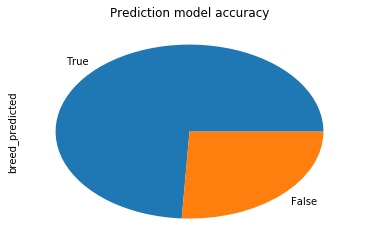

In [46]:
labels = np.full(len(df.breed_predicted.value_counts()), '', dtype = object)
labels[0] = 'True'
labels[1] = 'False'
df.breed_predicted.value_counts().plot(kind = 'pie', labels = labels)
plt.title('Prediction model accuracy')

For (Viz 1), we can see the model is a lot more accurate than not. 

### Viz 2: Most tweeted dog type

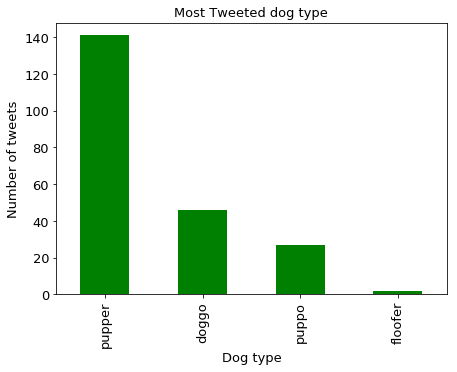

In [47]:
#plot
my_bar = df["dog_type"].value_counts().plot.bar(color = 'green', fontsize = 13)

#figure size(width, height)
my_bar.figure.set_size_inches(7, 5);

#Add labels
plt.title('Most Tweeted dog type', color = 'black', fontsize = '13')
plt.xlabel('Dog type', color = 'black', fontsize = '13')
plt.ylabel('Number of tweets', color = 'black', fontsize = '13');

### Viz 3: Is there a correlation between Retweet and like count?

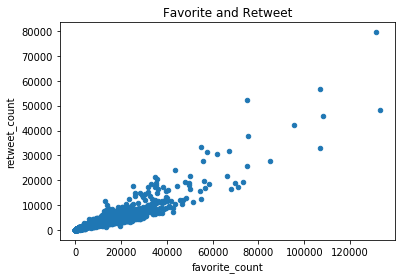

In [48]:
#Plotting the scatter plot

df.plot(x='favorite_count', y='retweet_count', kind='scatter', title = 'Favorite and Retweet');

From the chart, we can see there is a positive correlation between Retweets and Favorite

In [49]:
#calculating the correlation 

df['favorite_count'].corr(df['retweet_count'])

0.91294662741837007

### Viz 4: Top 5 Predictions

In [50]:
df.prediction.value_counts().nlargest(5)

golden retriever      139
Labrador retriever     95
Pembroke               88
Chihuahua              79
pug                    54
Name: prediction, dtype: int64

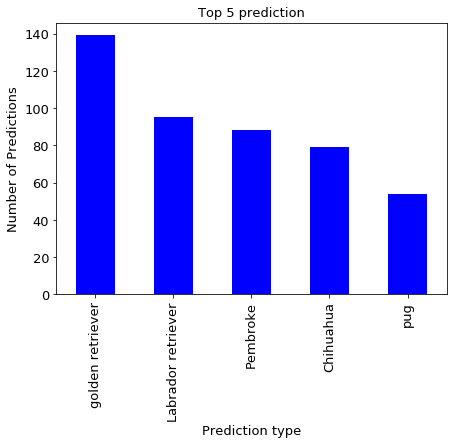

In [51]:
#plot
Prediction_bar = df.prediction.value_counts().nlargest(5).plot.bar(color = 'Blue', fontsize = 13)

#figure size(width, height)
Prediction_bar.figure.set_size_inches(7, 5);

#Add labels
plt.title('Top 5 prediction', color = 'black', fontsize = '13')
plt.xlabel('Prediction type', color = 'black', fontsize = '13')
plt.ylabel('Number of Predictions', color = 'black', fontsize = '13');

Golden Retriever has the highest number of predictions.